In [24]:
## La Liga Match Analysis (2013–2023)

#Objective:
#Analyze match outcomes, goal trends, and team dominance in La Liga.

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Importing Data
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/LaLiga_Analysis_2013_2023_FINAL.xlsx"

xls = pd.ExcelFile(file_path)
xls.sheet_names



['Raw_La_Liga data', 'Cleaned_Liga_Data', 'Season_Winners']

In [8]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/LaLiga_Analysis_2013_2023_FINAL.xlsx"

df = pd.read_excel(
    file_path,
    sheet_name="Cleaned_Liga_Data"
)

df.head()

,Season,Match_Day,Match_Date,Match_Date_Clean,Match_Time,Home_Team,Away_team,Resultado,Final_Score_Clean,Home_Team_Goal,Away_Team_Goal,Winner,Leauge Winner
0,2013-14,1,SAB 17.08.2013,17.08.2013,19:00:00,Real Sociedad,Getafe CF,2-0,2-0,2.0,0.0,Real Sociedad,Atlético de Madrid
1,2013-14,1,SAB 17.08.2013,17.08.2013,21:00:00,Real Valladolid CF,Athletic Club,2026-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2,2013-14,1,SAB 17.08.2013,17.08.2013,23:00:00,Valencia CF,MÃ¡laga CF,1-0,1-0,1.0,0.0,Valencia CF,NaN
3,2013-14,1,DOM 18.08.2013,18.08.2013,19:00:00,FC Barcelona,Levante UD,7-0,7-0,7.0,0.0,FC Barcelona,NaN
4,2013-14,1,DOM 18.08.2013,18.08.2013,21:00:00,CA Osasuna,Granada CF,2026-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             3800 non-null   object 
 1   Match_Day          3800 non-null   int64  
 2   Match_Date         3800 non-null   object 
 3   Match_Date_Clean   3800 non-null   object 
 4   Match_Time         3800 non-null   object 
 5   Home_Team          3800 non-null   object 
 6   Away_team          3800 non-null   object 
 7   Resultado          3800 non-null   object 
 8   Final_Score_Clean  1959 non-null   object 
 9   Home_Team_Goal     1859 non-null   float64
 10  Away_Team_Goal     1859 non-null   float64
 11  Winner             1959 non-null   object 
 12  Leauge Winner      11 non-null     object 
dtypes: float64(2), int64(1), object(10)
memory usage: 386.1+ KB


,0
Season,0
Match_Day,0
Match_Date,0
Match_Date_Clean,0
Match_Time,0
Home_Team,0
Away_team,0
Resultado,0
Final_Score_Clean,1841
Home_Team_Goal,1941


In [15]:
#RESULT TYPE (HOME / AWAY / DRAW)

df['Result_Type'] = df.apply(
    lambda x: 'Home Win' if x['Home_Team_Goal'] > x['Away_Team_Goal']
    else 'Away Win' if x['Away_Team_Goal'] > x['Home_Team_Goal']
    else 'Draw',
    axis=1
)

df['Result_Type'].value_counts()


,count
Result_Type,
Draw,2237
Home Win,963
Away Win,600


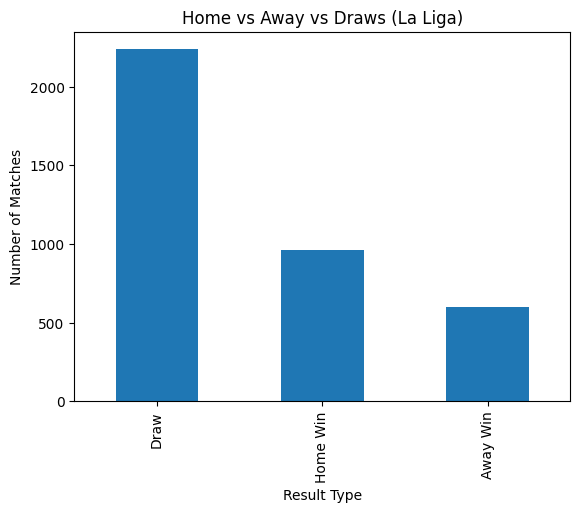

In [16]:
#HOME vs AWAY vs DRAW – GRAPH
import matplotlib.pyplot as plt

df['Result_Type'].value_counts().plot(kind='bar')
plt.title("Home vs Away vs Draws (La Liga)")
plt.xlabel("Result Type")
plt.ylabel("Number of Matches")
plt.show()


In [17]:
#GOALS ANALYSIS
#Total goals per match
df['Total_Goals'] = df['Home_Team_Goal'] + df['Away_Team_Goal']
df['Total_Goals'].describe()

,Total_Goals
count,1859.000000
mean,1.651963
std,1.285386
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [18]:
#Goals per season
season_goals = df.groupby('Season')['Total_Goals'].sum()
season_goals


,Total_Goals
Season,
2013-14,363.0
2014-15,360.0
2015-16,357.0
2016-17,296.0
2017-18,347.0
2018-19,283.0
2019-20,295.0
2020-21,272.0
2021-22,276.0


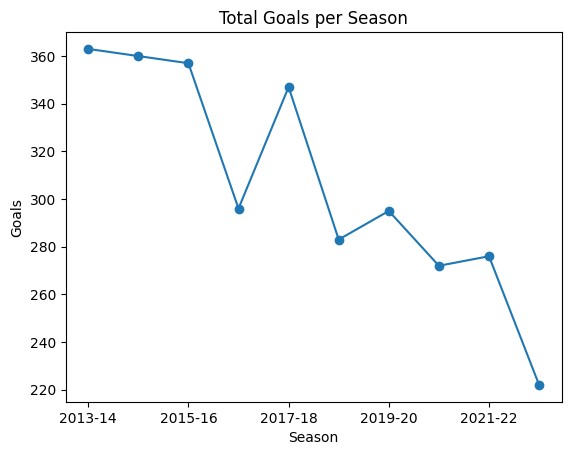

In [19]:
season_goals.plot(marker='o')
plt.title("Total Goals per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.show()


In [20]:
#TOP TEAMS
top_teams = df['Winner'].value_counts().head(5)
top_teams


,count
Winner,
Draw,396
Atlético de Madrid,158
FC Barcelona,150
Real Madrid,118
Sevilla FC,105


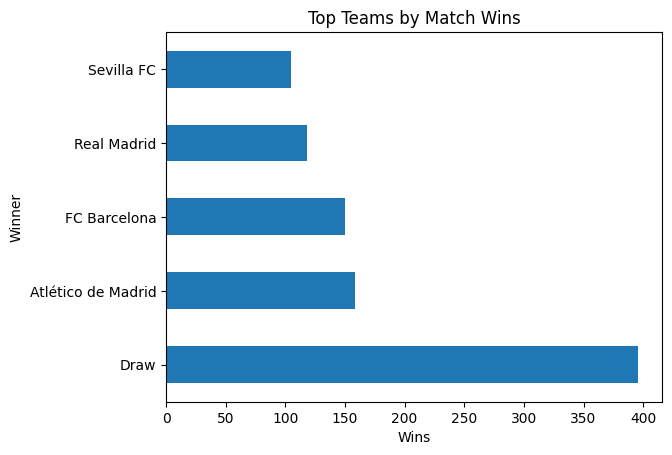

In [21]:
top_teams.plot(kind='barh')
plt.title("Top Teams by Match Wins")
plt.xlabel("Wins")
plt.show()


In [22]:
#MATCH DAY ANALYSIS
matchday_goals = df.groupby('Match_Day')['Total_Goals'].mean()
matchday_goals.head()


,Total_Goals
Match_Day,
1,1.462963
2,1.285714
3,1.777778
4,1.588235
5,1.333333


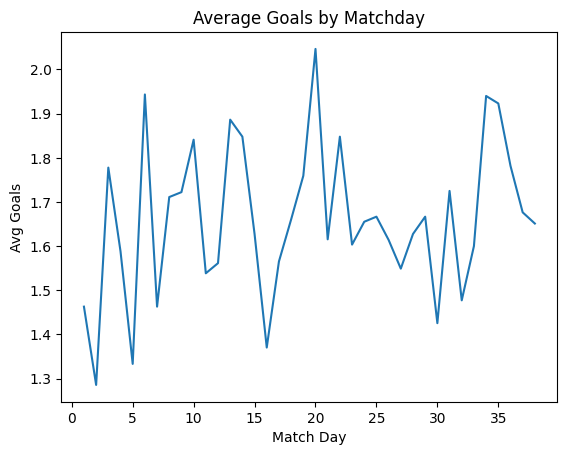

In [23]:
matchday_goals.plot()
plt.title("Average Goals by Matchday")
plt.xlabel("Match Day")
plt.ylabel("Avg Goals")
plt.show()


In [26]:
#“CHAMPIONS” (SEASON WINNERS)
champions = df[['Season', 'Leauge Winner']].drop_duplicates()
champions['Leauge Winner'].value_counts()


,count
Leauge Winner,
FC Barcelona,5
Real Madrid,3
Atlético de Madrid,2
